In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')
df = df.dropna()
df = df.drop(columns=['id', 'City', 'Work Pressure', 'Job Satisfaction', 'Profession', 'Degree'])

df = pd.get_dummies(df)
df.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Female,Gender_Male,Sleep Duration_5-6 hours,...,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,33.0,5.0,8.97,2.0,3.0,1.0,1,False,True,True,...,False,False,True,False,False,False,False,True,True,False
1,24.0,2.0,5.90,5.0,3.0,2.0,0,True,False,True,...,False,False,False,True,False,False,True,False,False,True
2,31.0,3.0,7.03,5.0,9.0,1.0,0,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,28.0,3.0,5.59,2.0,4.0,5.0,1,True,False,False,...,False,False,False,True,False,False,False,True,False,True
4,25.0,4.0,8.13,3.0,1.0,1.0,0,True,False,True,...,False,False,False,True,False,False,False,True,True,False


In [3]:
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'training set size: {len(X_train)}, test set size: {len(X_test)}')

training set size: 22318, test set size: 5580


In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [6]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7738351254480287


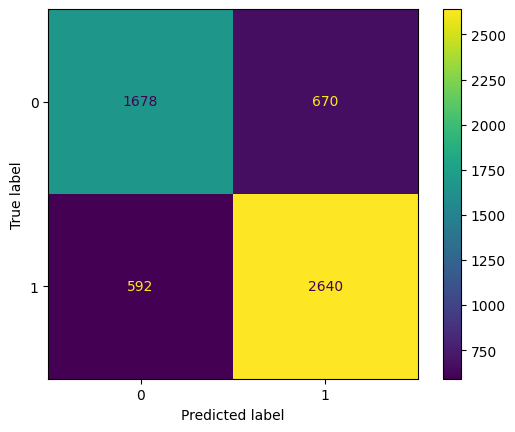

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

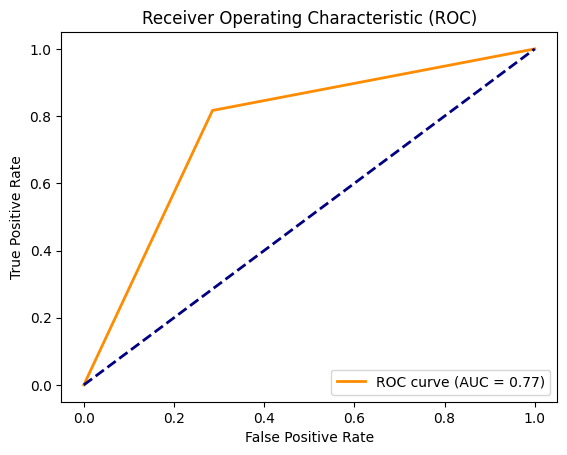

In [8]:
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class (label 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [9]:
# from graphviz import Source
# from sklearn.tree import export_graphviz

# export_graphviz(
#         clf,
#         out_file=os.path.join(IMAGES_PATH, "depression_tree.dot"),
#         feature_names=X.columns,
#         class_names=['Not Depressed', 'Depressed'],
#         rounded=True,
#         filled=True
#     )

# Source.from_file(os.path.join(IMAGES_PATH, "depression_tree.dot"))